In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
import tensorflow as tf
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 3.6.0
TensorFlow version: 2.18.0


In [3]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [4]:
encoder=OneHotEncoder()
encoder.fit([[1], [0]])

OneHotEncoder()

In [5]:
encoder.categories_

[array([0, 1])]

In [6]:
base_dir = '/content/drive/MyDrive/Colab_and_Datasets/datasets/btd'

In [7]:
#To get the class label base on class name
def label(class_label):
    if(class_label == "yes"):
        return 1
    else:
        return 0

#To clean the images by correctly resizing them and removing images with unsupported images
def clean_to_array(base_dir, class_label):
    X = []
    y = []
    l = label(class_label)
    path = os.path.join(base_dir, class_label)
    extensions = ("jpg", "jpeg", "png")
    for root, dir, files in os.walk(path):
        for file in files:
            if(file.endswith(extensions)):
                img_path = os.path.join(path, file)
                img = Image.open(img_path)
                img = img.resize((128, 128))
                img = np.array(img)
                if(img.shape == (128,128,3)):
                    X.append(img)
                    y.append(encoder.transform([[l]]).toarray()) #Also appending the respected class label to y list
    X = np.array(X) #Converting the list of images to numpy array
    y = np.array(y) #Converting the list of labels to numpy array
    return X, y

In [8]:
X, y = clean_to_array(base_dir, "yes") #Cleaning and reshaping the images of yes folder and returning image array to X, labels to y

In [9]:
X2, y2 = clean_to_array(base_dir, "no") #Cleaning and reshaping the images of yes folder and returning image array to X2, labels to y2

In [10]:
X = np.vstack((X, X2))

In [11]:
y = np.vstack((y, y2)) #Vertically stacking the class labels of respected images
y = y.reshape(2900, 2) #Reshaping the label array to 2D numpy array

In [13]:
print("Shape of X is ",  X.shape)
print("Shape of y is ", y.shape)

Shape of X is  (2900, 128, 128, 3)
Shape of y is  (2900, 2)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
print("Shape of X_train" , X_train.shape)
print("Shape of y_train",  y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (2320, 128, 128, 3)
Shape of y_train (2320, 2)
Shape of X_test (580, 128, 128, 3)
Shape of y_test (580, 2)


In [16]:
input_shape = (128, 128, 3) #Defining input shape of the images

In [17]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(2,2), input_shape=input_shape, padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test),)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 744ms/step - accuracy: 0.7174 - loss: 8.0252 - val_accuracy: 0.7724 - val_loss: 3.8303
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.8764 - loss: 0.7025 - val_accuracy: 0.8224 - val_loss: 1.2015
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9136 - loss: 0.2304 - val_accuracy: 0.8845 - val_loss: 0.4603
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9301 - loss: 0.1775 - val_accuracy: 0.9155 - val_loss: 0.3289
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9601 - loss: 0.1354 - val_accuracy: 0.9190 - val_loss: 0.2203
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9705 - loss: 0.0843 - val_accuracy: 0.9362 - val_loss: 0.2291
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9710 - loss: 0.0694 - val_accuracy: 0.9466 - val_loss: 0.1945
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9836 - loss: 0.0552 - val_accuracy: 

In [22]:
#Accuracy of model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Model Loss: %0.2f, accuracy: %0.2f' %((loss), (accuracy*100)))
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Model Loss: 0.26, Accuracy: 94.31%


In [23]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [24]:
y_test_flat = np.argmax(y_test, axis=1)
y_pred_flat = np.argmax(y_pred_classes, axis=1)

In [25]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred_flat))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       290
           1       0.97      0.90      0.94       290

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580



In [26]:
def plot_metrics(history):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


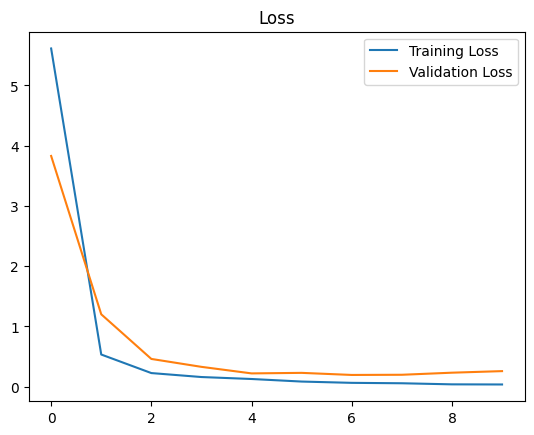

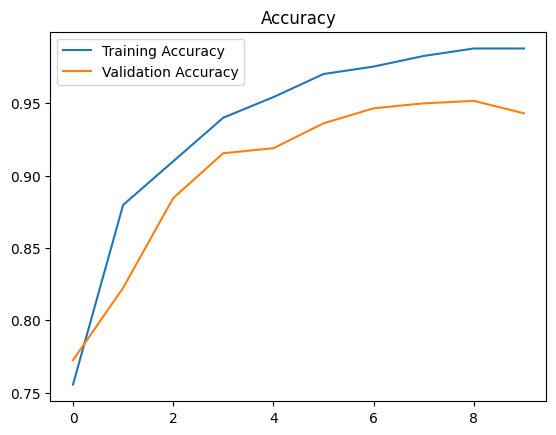

In [27]:
plot_metrics(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


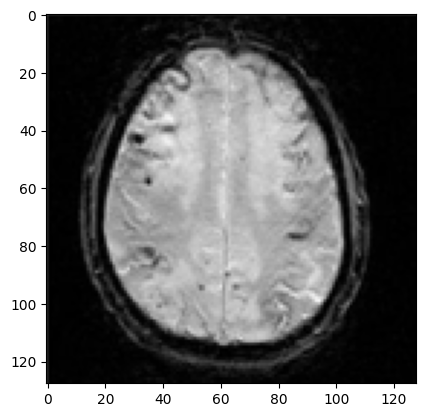

No, with a confidence of 0.71%


In [51]:
img = Image.open(r"/content/drive/MyDrive/Colab_and_Datasets/datasets/btd/pred/pred20.jpg")
img = img.resize((128, 128))

img = np.array(img)

img = np.reshape(img, (1, 128, 128, 3))

prediction = model.predict(img)

plt.imshow(img[0])
plt.show()

if prediction[0][0] > prediction[0][1]:
    print(f"No, with a confidence of {prediction[0][0]:.2f}%")
else:
    print(f"yes, with a confidence of {prediction[0][1]:.2f}%")
